In [2]:
from matplotlib import pyplot as plt 
import matplotlib.colors as mcolors
import numpy as np


### Aux functions to display results


In [3]:
# Plot the training set

def plot_points(points,targets):

    P = np.array_split(points, len(points[0]), axis=1)
    plt.scatter(P[0],P[1], color = ['r', 'g', 'r', 'g'], s = 40)
    plt.plot([-1.5, 1.5],[0,0], [0,0],[-1.5, 1.5], c='black')


# Plot the training set and the line found at an epoch (no bias version)
def plot_points_and_line(points, weight_history, epoch_to_view):
    line = compute_line_points(weight_history, epoch_to_view)
    plt.plot(line[0], line [1])

    P = np.array_split(points, len(points[0]), axis=1)
    plt.scatter(P[0],P[1], color = ['r', 'g', 'r', 'g'], s = 40)
    plt.plot([-1.5, 1.5],[0,0], [0,0],[-1.5, 1.5], c='black')    

def compute_line_points(weight_history, epoch_to_view):

    a = weight_history[epoch_to_view][0]
    b = weight_history[epoch_to_view][1]
    l = np.sqrt(a*a + b*b)
    a = a/l
    b = b/l
    if (a > b):
        bottomY = -2
        bottomX = -(-2 * b)/a
        topY = 2
        topX = -(2 * b)/a
    
    else :
        bottomX = -2
        bottomY = -(-2 * a)/b
        topX = 2
        topY = -(2 * a)/b

    return([bottomX, topX], [bottomY, topY])

    
# Plot the training set and the line found at an epoch (with bias)

def plot_points_and_line_2(points, weight_history, epoch_to_view):
    line = compute_line_points_2(weight_history, epoch_to_view)
    plt.plot(line[0], line [1])

    P = np.array_split(points, len(points[0]), axis=1)
    plt.scatter(P[0],P[1], color = ['r', 'g', 'r', 'g'], s = 40)
    plt.plot([-1.5, 1.5],[0,0], [0,0],[-1.5, 1.5], c='black')    
    
def compute_line_points_2(weight_history, epoch_to_view):

    a = weight_history[epoch_to_view][0]
    b = weight_history[epoch_to_view][1]
    c = weight_history[epoch_to_view][2]

    #l = np.sqrt(a*a + b*b)
    #a = a/l
    #b = b/l
    if (a > b):
        bottomY = -2
        bottomX = -(-2 * b + c)/a
        topY = 2
        topX = -(2 * b + c)/a
    
    else :
        bottomX = -2
        bottomY = -(-2 * a + c)/b
        topX = 2
        topY = -(2 * a + c)/b

    return([bottomX, topX], [bottomY, topY])
    



### The dataset

The inputs are the 2D coordinates of the points in the graph below. The outputs are as follows:

* red: -1
* blue: 1

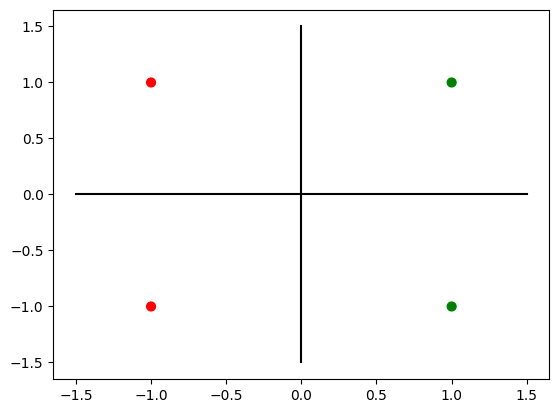

In [4]:
points = np.asarray([[-1,-1],[1,1],[-1,1], [1,-1]])
targets = np.asarray([-1, 1, -1, 1])

plot_points(points,targets)


### The model

A very simple model: an input layer with two units, and an output layer with a single linear unit


![](images/simple_net.png)

### Getting Initial values for the weights

In [5]:
def init_weights(n):

    return np.random.rand(n)

weights = init_weights(2)
print(weights)    

[0.26899263 0.43810017]


### Predict model outputs for our points

$ \hat{y} = \sum_i W_i * I_i$

In [6]:
def predict(points, weights):

    return np.sum(points * weights, axis = 1)

print(predict(points,weights))

[-0.7070928   0.7070928   0.16910754 -0.16910754]


### Loss function

$ Loss(y, \hat{y}) = \frac{1}{2} \sum_i (\hat{y} - y)^2$

where $y$ are the target values and $\hat{y}$ are the model predictions

In [7]:
def loss(output, targets):

    error = np.sum((output - targets)**2) * 0.5
    return error    

### Partial derivatives of the loss relative to the weights

$ \Large \frac{\partial L}{\partial W_i} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial W_i} = \large (\hat{y} - y) \times I_i$

In [8]:
def partial_derivatives(output, points,targets):

        return points * (outputs - targets)

### Compute the gradients

In [9]:
def compute_grads(outputs, points, targets):

    grad = np.zeros(len(points[0]))
    for i in range(len(points)):
        for k in range (len(points[0])):
            grad[k] +=  (outputs[i] - targets[i]) * points[i][k]
       
    return grad

### Testing

In [10]:

outputs = predict(points, weights)
error = loss(outputs, targets)
grads = compute_grads(outputs, points, targets)
print(outputs, error, grads)

[-0.7070928   0.7070928   0.16910754 -0.16910754] 1.452607061716161 [-2.92402948  1.75240067]


### Running gradient descent

In [11]:
def train(epochs, points, targets, print_iter = True):
    
    weights = init_weights(len(points[0]))
    print('initial weights: ', weights)


    learning_rate = 0.1

    weight_history = [np.copy(weights)]
    errors = []

    for i in range(epochs):

        outputs = predict(points,weights)
        error = loss(outputs, targets)
        errors.append(error)
        grads = compute_grads(outputs, points, targets)

        weights -= grads * learning_rate
        weight_history.append(np.copy(weights))

        if print_iter:
            print('error: ', error,  ' weights: ', weights)

    return weight_history, errors

weight_history, errors = train(10, points, targets)

initial weights:  [0.67198281 0.45577091]
error:  0.6306447999397609  weights:  [0.80318969 0.27346255]
error:  0.2270321279783139  weights:  [0.88191381 0.16407753]
error:  0.08173156607219301  weights:  [0.92914829 0.09844652]
error:  0.029423363785989476  weights:  [0.95748897 0.05906791]
error:  0.010592410962956201  weights:  [0.97449338 0.03544075]
error:  0.0038132679466642387  weights:  [0.98469603 0.02126445]
error:  0.001372776460799128  weights:  [0.99081762 0.01275867]
error:  0.0004941995258876885  weights:  [0.99449057 0.0076552 ]
error:  0.000177911829319569  weights:  [0.99669434 0.00459312]
error:  6.404825855504472e-05  weights:  [0.99801661 0.00275587]


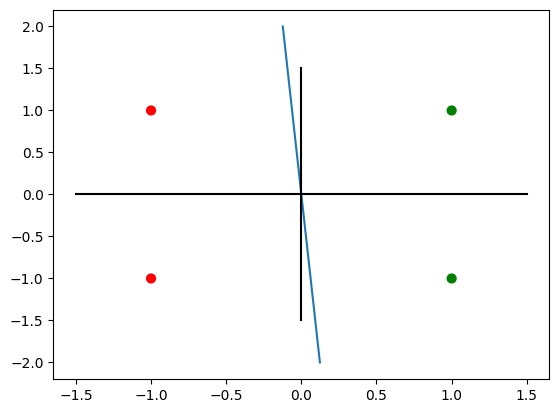

In [15]:
epoch_to_view = 4
plot_points_and_line(points, weight_history, epoch_to_view)

### Introducing Bias Weights

The line equation so far is given by

$W_o * I_0 + W_1 * I_1 = 0$

This represents a line that goes through the origin, which may not be sufficient to separate a linearly separable dataset.

Lets consider another dataset, as shown in the graph below.

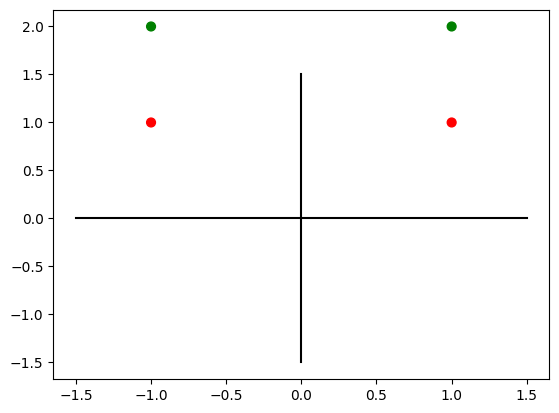

In [16]:
points_2 = np.asarray([[-1, 1],[-1,2],[1,1], [1,2]])
targets = np.asarray([-1, 1, -1, 1])

plot_points(points_2,targets)

##### Training with the new data set

initial weights:  [0.94573661 0.14074154]
error:  3.6063932954637785  weights:  [0.56744197 0.2       ]
error:  2.443980768569137  weights:  [0.34046518 0.2       ]
error:  2.0318330766848893  weights:  [0.20427911 0.2       ]
error:  1.8834599076065601  weights:  [0.12256746 0.2       ]
error:  1.8300455667383615  weights:  [0.07354048 0.2       ]
error:  1.81081640402581  weights:  [0.04412429 0.2       ]
error:  1.8038939054492915  weights:  [0.02647457 0.2       ]
error:  1.801401805961745  weights:  [0.01588474 0.2       ]
error:  1.800504650146228  weights:  [0.00953085 0.2       ]
error:  1.800181674052642  weights:  [0.00571851 0.2       ]


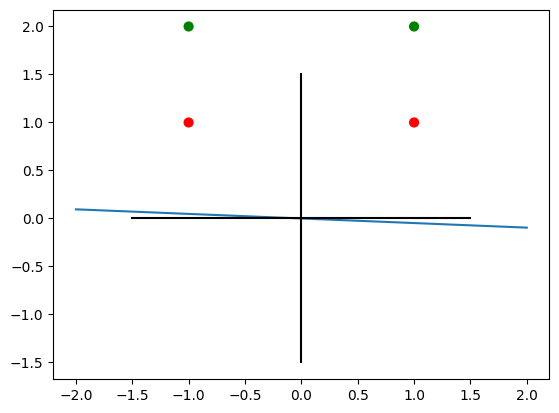

In [18]:
weight_history_2, errors_2 = train(10, points_2, targets)

epoch_to_view = 9
plot_points_and_line(points_2, weight_history_2, epoch_to_view)

Form the graph above it is clear that a line that passes through the origin is not sufficient to separate the green from the red points.

The general line equation is

$Ax + By + C = 0$

The model below implements such an equation

![](images/simple_net_with_bias.png)

The output is now computed as

$ \hat{y_k} = W_0 * I_0 + W_1 * I_1 + b$

The equation $W_0 * I_0 + W_1 * I_1 + b = 0$ represents the line whose coeffients are given by the weights and bias.


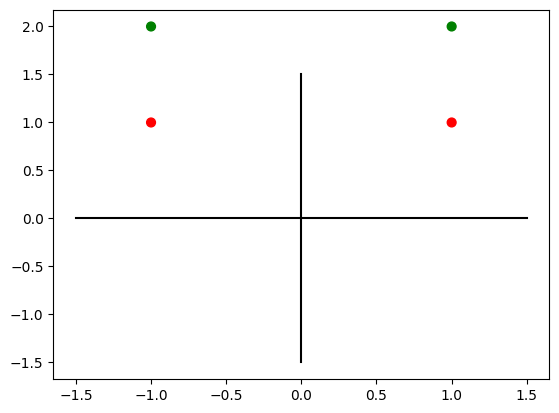

In [19]:
# these are the same points, we just added the bias coefficent, which is always 1

points_3 = np.asarray([[-1, 1, 1],[-1,2, 1],[1,1, 1], [1,2, 1]])

plot_points(points_3,targets)

#### Training the new model

In [20]:
weight_history_3, errors_3 = train(50, points_3, targets, print_iter=False)


initial weights:  [0.41802104 0.35368526 0.16144115]


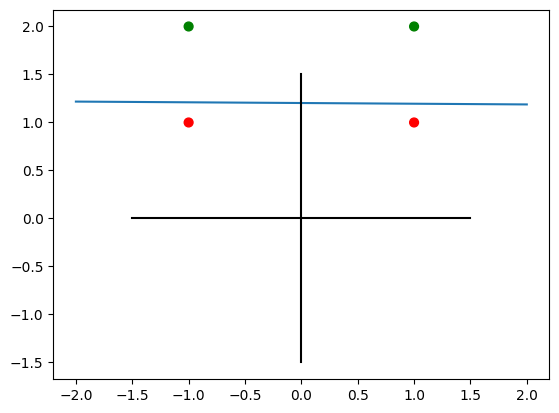

In [21]:

epoch_to_view = 9
plot_points_and_line_2(points_3, weight_history_3, epoch_to_view)

#### Plotting the error evolution

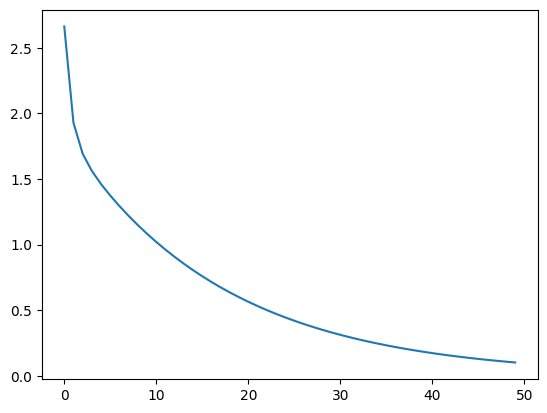

In [22]:
plt.plot(errors_3)

#### Plotting the heat map

-2.4012785681985163 (100, 100)


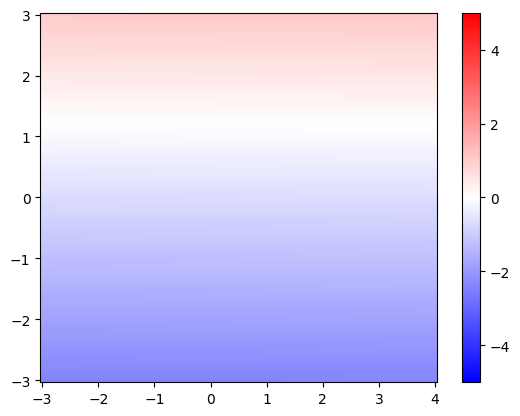

In [23]:
x = np.linspace(-3,4, 100)
y = np.linspace(-3,3, 100)

z = np.asarray([[np.sum([xx,yy,1] * weight_history_3[epoch_to_view]) for xx in x] for yy in y])
print(z[0][0], z.shape)
#norm = mcolors.TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)
plt.pcolor(x,y,z, cmap='bwr', vmin=-5, vmax=5)
plt.colorbar()
